In [189]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier

In [190]:
# Reading column names which stored in a names file
with open('Dataset/spambase.names', 'r') as f:
    lines = f.readlines()[33:]

column_names = [line.split(':')[0] for line in lines]
column_names.append('label')

In [191]:
# importing dataset to operate
spamBase = pd.read_csv('Dataset/spambase.data', names=column_names)

# Displaying the first 5 rows of the dataset
spamBase.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,label
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


# Exploring Data

In [192]:
# Checking for null values
spamBase.isnull().sum()

word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

In [193]:
# Another method for checking Null Values but in a generalized way
spamBase.isnull().values.any()

False

In [194]:
# Checking the total count of Duplicate Values
duplicate_rows = spamBase[spamBase.duplicated()]
print("Duplicate Values :", len(duplicate_rows))

Duplicate Values : 391


In [195]:
# Removing the Duplicate values
spamBase.drop_duplicates(inplace=True)

In [196]:
#Checking the Shape of dataset after removing duplicates
spamBase.shape

(4210, 58)

In [197]:
# Checking Dataset's Info
spamBase.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4210 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4210 non-null   float64
 1   word_freq_address           4210 non-null   float64
 2   word_freq_all               4210 non-null   float64
 3   word_freq_3d                4210 non-null   float64
 4   word_freq_our               4210 non-null   float64
 5   word_freq_over              4210 non-null   float64
 6   word_freq_remove            4210 non-null   float64
 7   word_freq_internet          4210 non-null   float64
 8   word_freq_order             4210 non-null   float64
 9   word_freq_mail              4210 non-null   float64
 10  word_freq_receive           4210 non-null   float64
 11  word_freq_will              4210 non-null   float64
 12  word_freq_people            4210 non-null   float64
 13  word_freq_report            4210 

In [198]:
# Displaying some statistics
print(spamBase.describe())

       word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
count     4210.000000        4210.000000    4210.000000   4210.000000   
mean         0.104366           0.112656       0.291473      0.063078   
std          0.300005           0.454260       0.515719      1.352487   
min          0.000000           0.000000       0.000000      0.000000   
25%          0.000000           0.000000       0.000000      0.000000   
50%          0.000000           0.000000       0.000000      0.000000   
75%          0.000000           0.000000       0.440000      0.000000   
max          4.540000          14.280000       5.100000     42.810000   

       word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
count    4210.000000     4210.000000       4210.000000         4210.000000   
mean        0.325321        0.096656          0.117475            0.108000   
std         0.687805        0.276030          0.397284            0.410282   
min         0.000000        0.

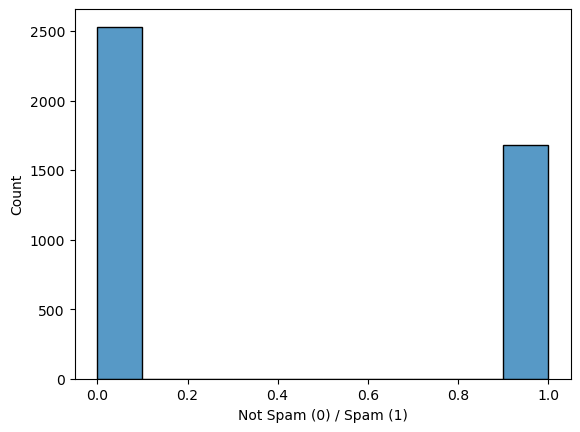

In [199]:
import seaborn as sns

# Plotting the distribution of the target variable
sns.histplot(data=spamBase, x='label', bins=10)
plt.xlabel('Not Spam (0) / Spam (1)')
plt.ylabel('Count')
plt.show()


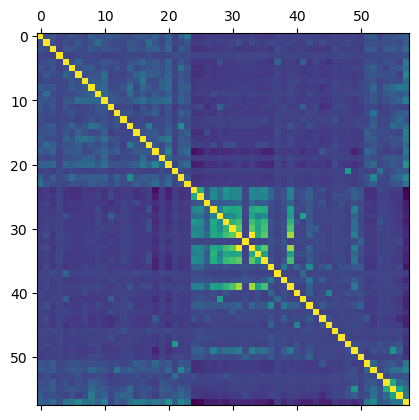

In [200]:
# Plotting the correlation matrix of the features
correlation_matrix = spamBase.corr()
plt.matshow(correlation_matrix)
plt.show()

# Setting KNN Model

In [201]:
# Split the dataset into features and target variable
X = spamBase.iloc[:, :-1]
y = spamBase.iloc[:, -1]

In [202]:
from sklearn.model_selection import train_test_split

# spliting dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [203]:
from sklearn.preprocessing import StandardScaler

# Feature Selection
fs = StandardScaler()
X_train = fs.fit_transform(X_train)
X_test = fs.transform(X_test)

# Modelling

In [204]:
import warnings

# Ignoring Future Warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [205]:
# Fitting classifier to the Training set
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=11, metric='manhattan', p=1)
KNN.fit(X_train,y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=11, p=1)

# Prediction

In [206]:
# Displaying first 5 model predictions on the test data

y_predictor = KNN.predict(X_test)

print(y_predictor[:10])

[1 0 0 1 0 0 0 0 0 0]


# Evaluation

In [207]:
#checking accuracy of the model on the test data
print("Test data accuracy:", KNN.score(X_test, y_test))

Test data accuracy: 0.905982905982906


In [208]:
# checking accuracy of our model on the Train Data
print("Train data accuracy:",KNN.score(X_train, y_train))

Train data accuracy: 0.9132087424770352


In [209]:
## printing all the evaluation metrics score 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

knn_accuracy = accuracy_score(y_test, y_predictor)
knn_precision = precision_score(y_test, y_predictor)
knn_recall = recall_score(y_test, y_predictor)
knn_f1_score = f1_score(y_test, y_predictor)

print(f"K Nearest Neighbors Evaluation Metrics:\nAccuracy: {knn_accuracy:.4f}\nPrecision: {knn_precision:.4f}\nRecall: {knn_recall:.4f}\nF1 score: {knn_f1_score:.4f}")

K Nearest Neighbors Evaluation Metrics:
Accuracy: 0.9060
Precision: 0.9471
Recall: 0.8192
F1 score: 0.8785


In [210]:
# Displaying the Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_Matrix = confusion_matrix(y_test, y_predictor)
print(confusion_Matrix)

[[596  20]
 [ 79 358]]


In [211]:
# Evaluating the model on the testing data set through displaying classification report 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_test, y_predictor))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92       616
           1       0.95      0.82      0.88       437

    accuracy                           0.91      1053
   macro avg       0.92      0.89      0.90      1053
weighted avg       0.91      0.91      0.90      1053



# Visualization

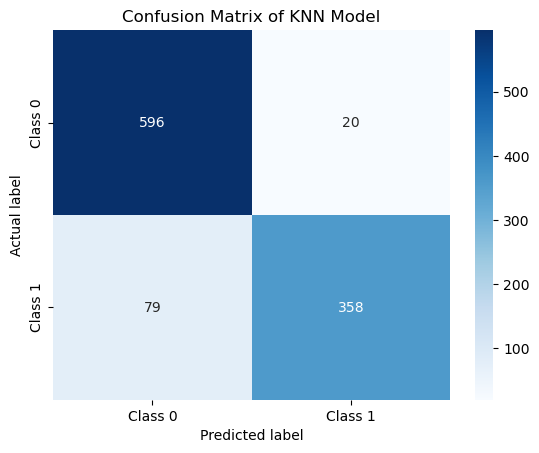

In [212]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test,y_predictor)

# Plot confusion matrix
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
plt.title('Confusion Matrix of KNN Model')
plt.show()

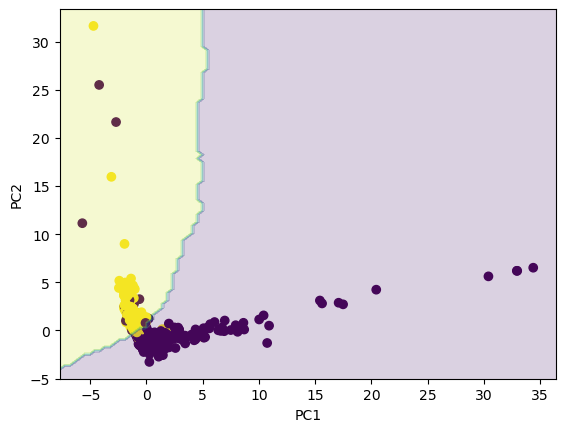

In [213]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
from sklearn.decomposition import PCA


# Defining the PCA object
pca = PCA(n_components=2)

# Fitting and transform test set to 2D space
X_pca = pca.fit_transform(X_test)

# Plotting the data and the decision boundary
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_test, cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')

# Creating a meshgrid to evaluate the decision boundary
xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()
xx, yy = np.meshgrid(np.linspace(xmin, xmax, 100), np.linspace(ymin, ymax, 100))
Z = KNN.predict(pca.inverse_transform(np.c_[xx.ravel(), yy.ravel()]))

# Plot the decision boundary
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap='viridis', alpha=0.2)

plt.show()

# ---------------------------------------------------------------------------------------------------------------

# Decision Tree Model

In [214]:
# Splitting the dataset into features and target variable
X = spamBase.iloc[:, :-1]  # Selecting all columns except the last one as features
y = spamBase.iloc[:, -1]   # Selecting the last column as target variable

In [215]:
from sklearn.model_selection import train_test_split

# spliting dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [216]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

# Performing Cross validation
max_depth_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
for max_depth in max_depth_values:
    model = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    scores = cross_val_score(model, X, y, cv=5)
    mean_score = scores.mean()
    print("max_depth = ", max_depth, ":", "mean accuracy = ", mean_score*100 )

max_depth =  1 : mean accuracy =  76.8646080760095
max_depth =  2 : mean accuracy =  83.9667458432304
max_depth =  3 : mean accuracy =  87.41092636579573
max_depth =  4 : mean accuracy =  88.12351543942994
max_depth =  5 : mean accuracy =  88.74109263657957
max_depth =  6 : mean accuracy =  89.21615201900238
max_depth =  7 : mean accuracy =  89.02612826603325
max_depth =  8 : mean accuracy =  89.23990498812351
max_depth =  9 : mean accuracy =  88.95486935866984
max_depth =  10 : mean accuracy =  89.66745843230403


# Modelling

In [217]:
dt = DecisionTreeClassifier(criterion="entropy", max_depth = 6)
dt

DecisionTreeClassifier(criterion='entropy', max_depth=6)

In [218]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6)

# Predictions

In [219]:
DT_predict = dt.predict(X_test)

# Evaluation

In [220]:
from sklearn import metrics
#  Accuracy Score on Testing Data set
predictions_test =  metrics.accuracy_score(y_test, DT_predict)
print("DecisionTrees's Testing Accuracy: ",predictions_test)

DecisionTrees's Testing Accuracy:  0.9014251781472684


In [221]:
#  Accuracy Score on Training Data set
from sklearn.metrics import accuracy_score
predictions_train = dt.predict(X_train)
Train_acc = accuracy_score(y_train,predictions_train)
print("DecisionTrees's Training Accuracy: ",Train_acc)

DecisionTrees's Training Accuracy:  0.9281472684085511


In [229]:
## printing all the evaluation metrics score 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

DT_accuracy = accuracy_score(y_test, DT_predict)
DT_precision = precision_score(y_test, DT_predict)
DT_recall = recall_score(y_test, DT_predict)
DT_f1_score = f1_score(y_test, DT_predict)

print(f"Decision Tree's Evaluation Metrics:\nAccuracy: {DT_accuracy:.4f}\nPrecision: {DT_precision:.4f}\nRecall: {DT_recall:.4f}\nF1 score: {DT_f1_score:.4f}")

Decision Tree's Evaluation Metrics:
Accuracy: 0.9014
Precision: 0.9340
Recall: 0.8273
F1 score: 0.8774


In [223]:
# Displaying the Confusion Matrix on Test data set
from sklearn.metrics import confusion_matrix
confMatrix = confusion_matrix(y_test, DT_predict)
confMatrix

array([[462,  21],
       [ 62, 297]], dtype=int64)

In [224]:
# Evaluating the model on the testing data set using classification report
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_test, DT_predict))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92       483
           1       0.93      0.83      0.88       359

    accuracy                           0.90       842
   macro avg       0.91      0.89      0.90       842
weighted avg       0.90      0.90      0.90       842



In [225]:
# predicting the class probabilities for the testing set
test_probability = dt.predict_proba(X_test)

# calculating the true and positives rates 
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(DT_predict, test_probability[:, 1])

# calculate the area under ROC curve 
roc_auc = auc(fpr, tpr)

# Visualization

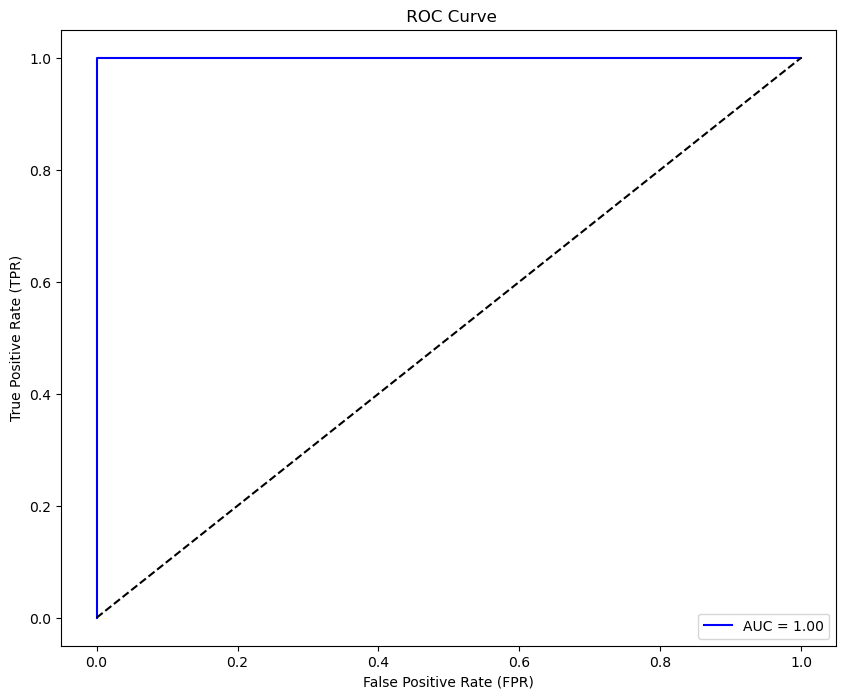

In [226]:
# Plotting the ROC curve
plt.figure(figsize=(10,8))
plt.plot(fpr, tpr, color='Blue', label='AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1], color='Black', linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title(' ROC Curve')
plt.legend()
plt.show()

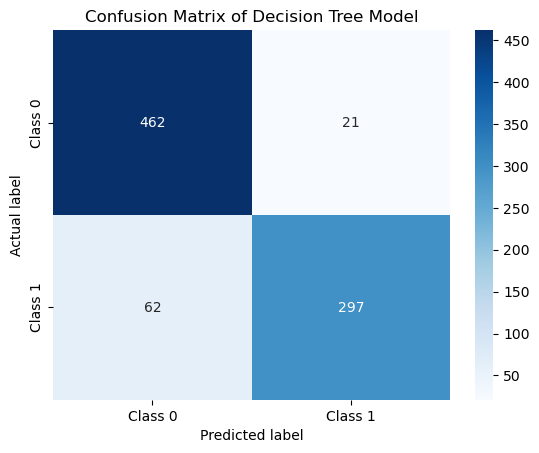

In [227]:

import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test,DT_predict)

# Plot confusion matrix
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
plt.title('Confusion Matrix of Decision Tree Model')
plt.show()

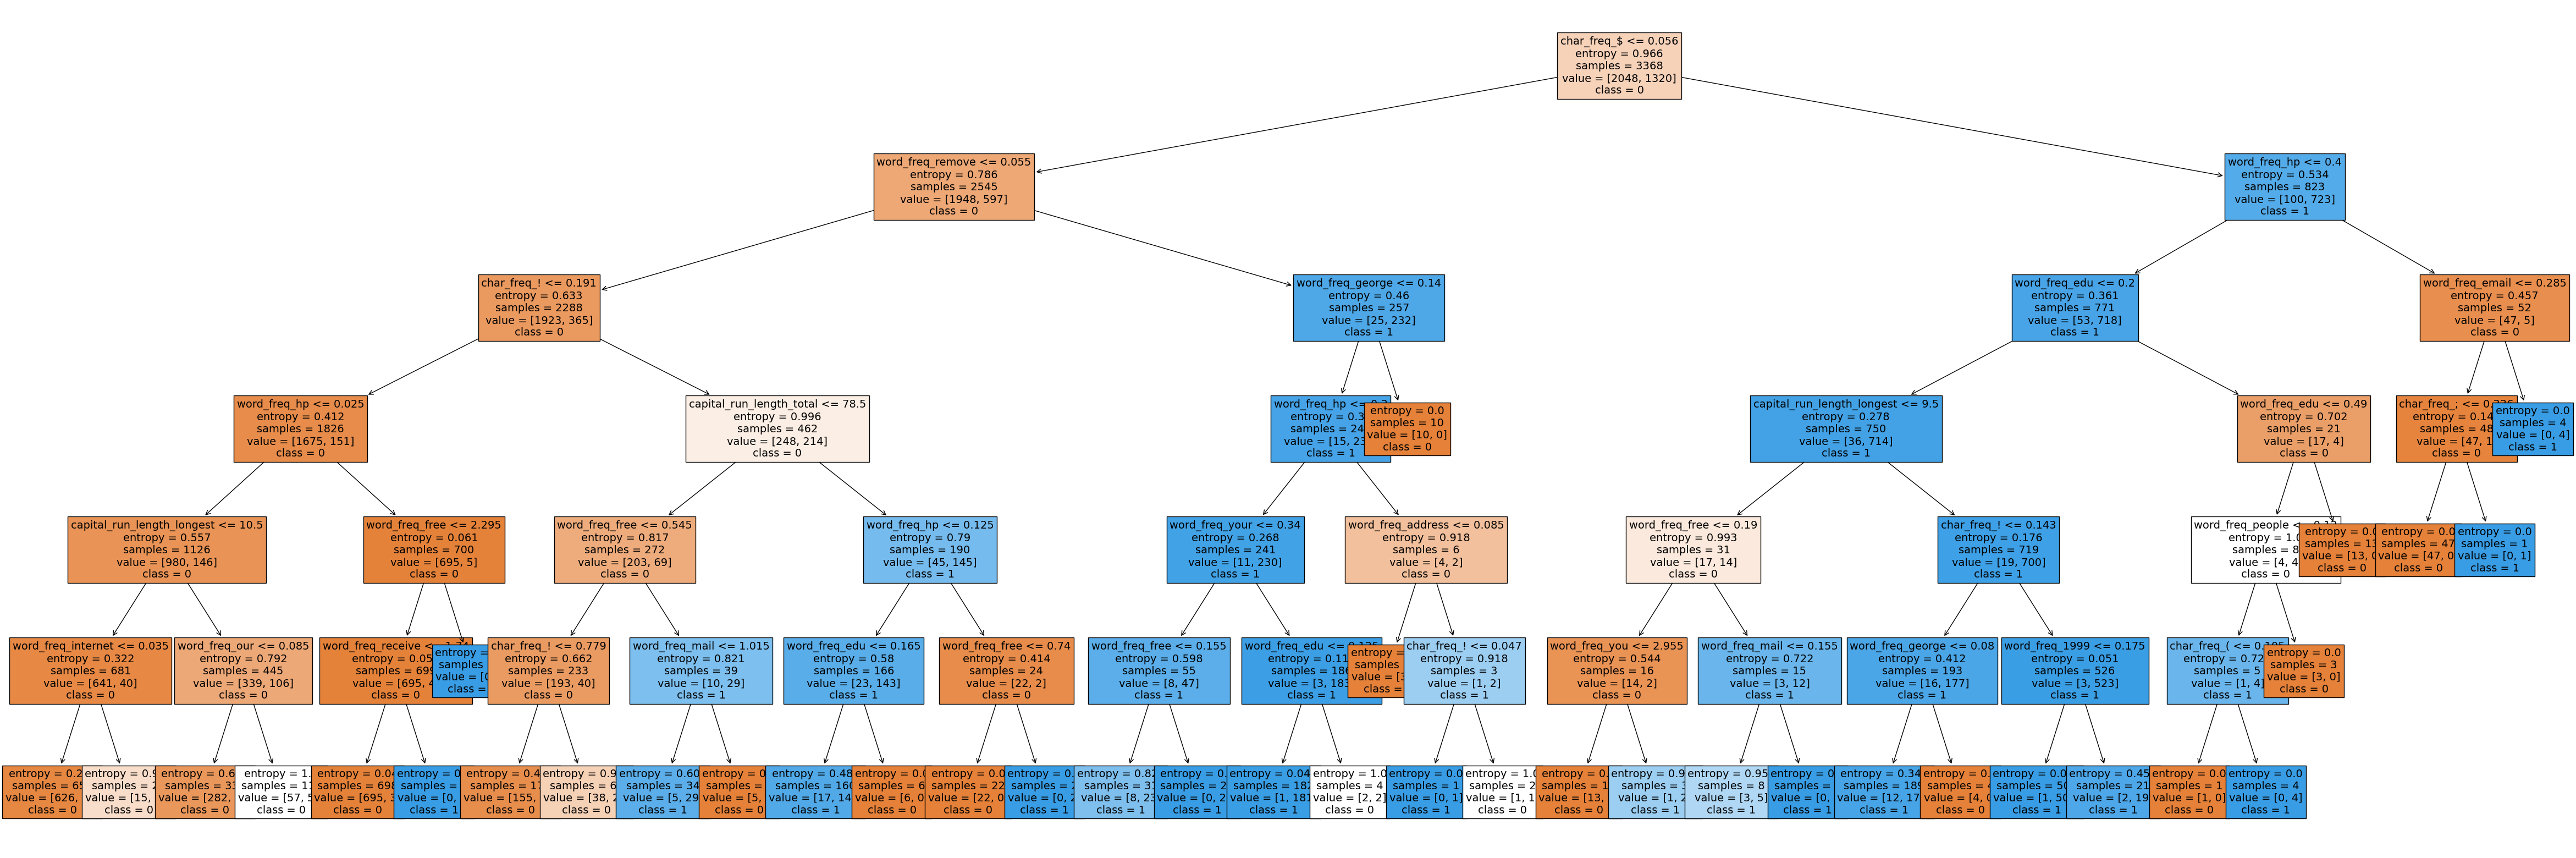

In [228]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Defining the class names
classes = list(map(str, np.unique(y_train)))

# Setting the figure size and plotting the decision tree
plt.figure(figsize=(60, 20))
plot_tree(dt, feature_names=spamBase.columns[0:57], class_names=classes, filled=True, fontsize=14)

# Displaying the plot
plt.show()